In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
%matplotlib inline


/home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/python/f

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Netowkrs/MNIST-data/",one_hot=True)

W0909 03:43:10.130210 140515108820800 deprecation.py:323] From <ipython-input-3-8e95549462ff>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0909 03:43:10.131269 140515108820800 deprecation.py:323] From /home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0909 03:43:10.132832 140515108820800 deprecation.py:323] From /home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in

Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/train-images-idx3-ubyte.gz


W0909 03:43:10.337307 140515108820800 deprecation.py:323] From /home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0909 03:43:10.338798 140515108820800 deprecation.py:323] From /home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0909 03:43:10.375756 140515108820800 deprecation.py:323] From /home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.dat

Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Netowkrs/MNIST-data/t10k-labels-idx1-ubyte.gz


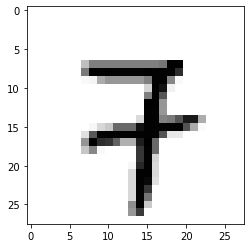

In [4]:
plt.imshow(mnist.train.images[14].reshape(28,28),cmap='Greys')

In [5]:
def make_generator():
    generator = tf.keras.Sequential()
    generator.add(layers.Dense(200, activation='relu',input_shape=(100,)))
    generator.add(layers.Dense(400, activation='relu'))
    generator.add(layers.Dense(600, activation='relu'))
    generator.add(layers.Dense(784, activation='relu'))
    return generator

In [6]:
def make_discriminator():
    discriminator = tf.keras.Sequential()
    discriminator.add(layers.Dense(784, activation='relu'))
    discriminator.add(layers.Dense(400, activation='relu'))
    discriminator.add(layers.Dense(200, activation='relu'))
    discriminator.add(layers.Dense(1, activation='relu'))
    return discriminator

In [7]:
def make_adversarial(generator,discriminator):
    adversarial = tf.keras.Sequential()
    adversarial.add(generator)
    adversarial.add(discriminator)
    return adversarial

In [8]:
generator = make_generator()

W0909 03:43:10.595825 140515108820800 deprecation.py:506] From /home/ryan/.conda/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
noise = tf.random.normal([5,100])

In [10]:
generated_image = generator.predict(noise,steps=1)

In [11]:
with tf.Session() as sess:
    print(sess.run(noise[:,0]))

[-0.5020981  -2.6236696  -0.80785006 -1.0579133  -1.9877104 ]


In [12]:
temp_image = 0
with tf.Session() as sess:
    print(sess.run(tf.shape(generated_image)))
    temp_image = sess.run(tf.reshape(generated_image,[5,28,28]))
    print(sess.run(tf.shape(temp_image)))

[  5 784]
[ 5 28 28]


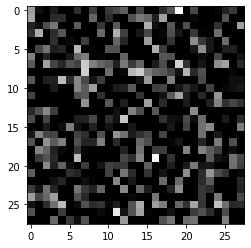

In [13]:
plt.imshow(temp_image[0,:,:],cmap='gray')

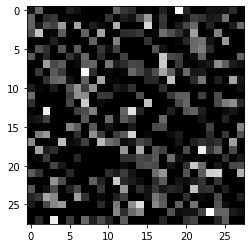

In [14]:
plt.imshow(temp_image[1,:,:],cmap='gray')

In [15]:
discriminator = make_discriminator()

In [16]:
fake_or_real = discriminator.predict(generated_image,steps=1)

In [17]:
print(fake_or_real)

[[0.0403524 ]
 [0.02210578]
 [0.07981992]
 [0.10315779]
 [0.03849033]]


In [18]:
adversarial = make_adversarial(generator,discriminator)

In [19]:
real_images = tf.placeholder(tf.float32,shape=[None,784])
z = tf.placeholder(tf.float32,shape=[None,100])

In [20]:
adversarial = make_adversarial(generator,discriminator)

In [21]:
adversarial.compile(optimizer=tf.train.AdamOptimizer(0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
discriminator.compile(optimizer=tf.train.AdamOptimizer(0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [24]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [25]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [26]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [27]:
#@tf.function
def train_step(images,batch_size):
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)

        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)

        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [41]:
batch_size = 200

In [42]:
epochs = 1

In [43]:
init = tf.global_variables_initializer()

In [44]:
noise = tf.random.normal([10,100])
generated_images1 = generator.predict(noise,steps=1)

In [45]:
temp_image = 0
with tf.Session() as sess:
    print(sess.run(tf.shape(generated_images1)))
    temp_image = sess.run(tf.reshape(generated_images1,[10,28,28]))
    print(sess.run(tf.shape(temp_image)))

[ 10 784]
[10 28 28]


In [51]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        num_batches = mnist.train.num_examples // batch_size

        for i in range(num_batches):
            print("{} of batches {}".format(i,num_batches))
            batch = mnist.train.next_batch(batch_size)

            batch_images = batch[0].reshape((batch_size,784))

            batch_images = tf.convert_to_tensor(batch_images,dtype=tf.float32)


            train_step(batch_images,batch_size)

            
        print("ON EPOCH {}".format(epoch))

0 of batches 275
1 of batches 275
2 of batches 275
3 of batches 275
4 of batches 275
5 of batches 275
6 of batches 275
7 of batches 275
8 of batches 275
9 of batches 275
10 of batches 275
11 of batches 275
12 of batches 275
13 of batches 275
14 of batches 275
15 of batches 275
16 of batches 275
17 of batches 275
18 of batches 275
19 of batches 275
20 of batches 275
21 of batches 275
22 of batches 275
23 of batches 275
24 of batches 275
25 of batches 275
26 of batches 275
27 of batches 275
28 of batches 275
29 of batches 275
30 of batches 275
31 of batches 275
32 of batches 275
33 of batches 275
34 of batches 275
35 of batches 275
36 of batches 275
37 of batches 275
38 of batches 275
39 of batches 275
40 of batches 275
41 of batches 275
42 of batches 275
43 of batches 275
44 of batches 275
45 of batches 275
46 of batches 275
47 of batches 275
48 of batches 275
49 of batches 275
50 of batches 275
51 of batches 275
52 of batches 275
53 of batches 275
54 of batches 275
55 of batches 275
56

KeyboardInterrupt: 

In [47]:
generated_images2 = generator.predict(noise,steps=1)

In [48]:
temp_image = 0
with tf.Session() as sess:
    print(sess.run(tf.shape(generated_images2)))
    temp_image = sess.run(tf.reshape(generated_images2,[10,28,28]))
    print(sess.run(tf.shape(temp_image)))

[ 10 784]
[10 28 28]


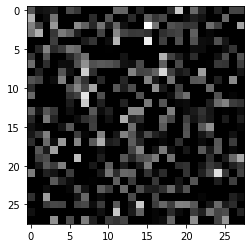

In [49]:
plt.imshow(temp_image[1,:,:],cmap='gray')

In [ ]:
#f, a = plt.subplots(2,10,figsize=(20,4))
#for i in range(10):
#    a[0][i].imshow(bt_samples[0][i].reshape(28,28))
#    a[1][i].imshow(at_samples[0][i].reshape(28,28))